## Benchmarking Problem

Numpy has in-built universal functions that allow operations on multidimentional arrays. For this problem, you will be asked to test the performance of some of this functions.

For this, create an `NxN` matrix `A` and an array `B` of size `N`, with random entries. Using `A` and `B` as inputs, performing the following operations: (compare and time the performance of sorting algorithms with and without numpy func)

1. Computing Determinant of `A` ( `numpy.linalg.det` ) for `N`
2. Matrix Multiplication of `A*A` ( `numpy.matmul`) for `N`

Plot the operation times for Numpy functions vs regular python commands for each operation.

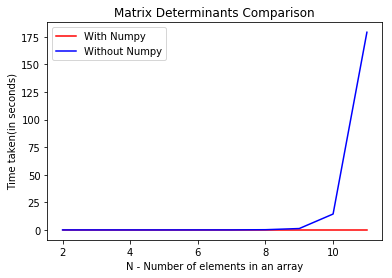

In [2]:
# 1. Computing Determinant of A
# For this function I have consider N-value from 2 to 12
import numpy as np
import time
import matplotlib.pyplot as plt
%matplotlib inline 

def calDeterminant(A):
    n=len(A)
    sign =1 # sign is used for sign(+ or -)
    determinant=0
    if(n == 2):
        return (A[0][0]*A[1][1]-A[0][1]*A[1][0])
    else:
        for i in range(0,n):
            dtemp={}
            for j in range(1,n):
                k=0
                dtemp[j]=[]
                while k<=n-1:
                    if (k!=i):
                        dtemp[j].append(A[j][k])
                    k+=1
            A1=[dtemp[x] for x in dtemp]
            determinant = determinant+sign*(A[0][i])*(calDeterminant(A1)) #Recursively call the determinant
            sign=sign*(-1)
        return determinant

def CompareDeterminant():
    N = list(range(2,12))
    numpyTime = []
    normalTime = []
    for i in N:
        A = np.random.random((i,i))
        start = time.time()
        numDet = np.linalg.det(A)
        end = time.time()
        timeTaken = end - start
        numpyTime.append(timeTaken)
        start = time.time()
        determinant = calDeterminant(A)
        end = time.time()
        timeTaken2 = end - start
        normalTime.append(timeTaken2)
    plt.subplot()
    plt.plot(N,numpyTime,'r',label="With Numpy")
    plt.plot(N,normalTime,'b',label="Without Numpy")
    plt.xlabel('N - Number of elements in an array')
    plt.ylabel('Time taken(in seconds)')
    plt.title('Matrix Determinants Comparison')
    plt.legend(loc='upper left')
        
CompareDeterminant()    

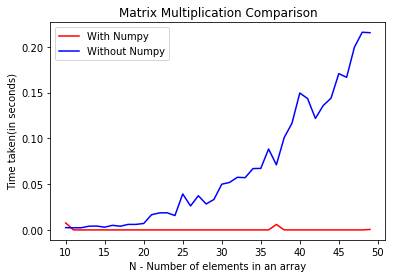

In [3]:
# 2. Matrix multiplication of A*A
# For this function I have consider N-value from 10 to 50

def CompareMatrixMul():
    N = list(range(10,50))
    numpyTime = []
    normalTime = []
    for i in N:
        A = np.random.random((i,i))
        resultMatrix = np.zeros((i,i))
        start = time.time()
        mul = np.matmul(A,A)
        end = time.time()
        timeTaken = end - start
        numpyTime.append(timeTaken)
        start = time.time()
        for i in range(len(A)):
            for j in range(len(A[0])):
                for k in range(len(A)):
                    resultMatrix[i][j] += A[i][k] * A[k][j]
        end = time.time()
        timeTaken2 = end - start
        normalTime.append(timeTaken2)
    plt.subplot()
    plt.plot(N,numpyTime,'r',label="With Numpy")
    plt.plot(N,normalTime,'b',label="Without Numpy")
    plt.xlabel('N - Number of elements in an array')
    plt.ylabel('Time taken(in seconds)')
    plt.title('Matrix Multiplication Comparison')
    plt.legend(loc='upper left')
    
CompareMatrixMul()